# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Exploration and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Export your environment for submission as 'prj01-environment.txt'.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. All cell outputs and <b>figures must display in jupyter lab</b>. (Test this, in particular when you use another environment like VS Code.)</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

Explicitly and clearly state the chosen dataset number and title:
Dataset 3. Bevölkerung ODÖ Hunde pro Bezirk Wien
Stadt Wien, Magistrat Wien - Magistratsabteilung 6 - Rechnungs- und Abgabenwesen, "Hunde pro Bezirk Wien". URL: https://www.data.gv.at/katalog/de/dataset/stadt-wien_anzahlderhundeprobezirkderstadtwien



This notebook was created and tested using Jupyter Lab and Python version 3.10. For packages/env please refer to /environments. 

## Libraries

In [1]:
#libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Check for footnotes or any other notifications on special cell content, such as time series breaks. Follow up that information, and document your decision how to deal with it. Remember: The homework 4 contained such info in the cell "76.1 b". The metadata defines what that "b" stands for.

- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Use graphical and/or numeric approaches. Once identified, handle missing values according to column type, time series property and data set size.
    2. duplicates (justify the used column subset). Remove duplicates - if any - and inspect what you removed.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. categorical columns: number of unique values, counts 
        2. numeric columns: range and median

### Obtain and Scrub

In [2]:
# Read in main data set
file=os.path.join('data','hunde-wien.csv')
df=pd.read_csv(file, sep = ';',encoding= 'latin-1', header = 1, thousands='.') #Reading in the data with pandas read_csv.
df.head() #Showing the first 5 rows of our dataset

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,Postal_CODE,Dog Breed,Anzahl,Ref_Date
0,AT1,AT13,AT113,90100,.,1010,Akita / Belgischer Schäferhund,1,20231201
1,AT1,AT13,AT113,90100,.,1010,American Cocker Spaniel,2,20231201
2,AT1,AT13,AT113,90100,.,1010,American Cocker Spaniel / Pudel,1,20231201
3,AT1,AT13,AT113,90100,.,1010,American Staffordshire Terrier,1,20231201
4,AT1,AT13,AT113,90100,.,1010,Australian Shepherd,5,20231201


We used pandas *read_csv* to read our data into jupyter lab.The column separater is a semicolon and encoding is *latin-1* (also known as ISO-8859-1). It covers a limited set of characters, primarily from the Latin alphabet, digits, and some special characters. The first row in the file represents the header. Additionaly we set the thousand-symbol as a dot, so that the read_csv would not automatically read it as a delimeter for the decimal. The data is in a long format.

In [3]:
df.dtypes #Showing the column datatypes

NUTS1                object
NUTS2                object
NUTS3                object
DISTRICT_CODE         int64
SUB_DISTRICT_CODE    object
Postal_CODE           int64
Dog Breed            object
Anzahl                int64
Ref_Date              int64
dtype: object

In [4]:
df.shape

(10522, 9)

The dataset consists of 10.522 rows and 9 columns.

In [5]:
df.nunique(axis='rows') #Checking the number of unique values per column

NUTS1                   1
NUTS2                   1
NUTS3                   1
DISTRICT_CODE          23
SUB_DISTRICT_CODE       1
Postal_CODE            23
Dog Breed            3214
Anzahl                163
Ref_Date                1
dtype: int64

What we can see here, is that *NUTS1, NUTS2, NUTS3, SUB_DISTRICT_CODE* and *Ref_Date* only have one single value in all of the 10.522 rows.
- NUTS (Nomenclature of Territorial Units for Statistics) is a classification system used by the European Union for statistical and administrative purposes.*NUTS1, NUTS2, NUTS3* indicate the level in the hierarchy.In our case, every row has the same level of the hierachy in all three columns. Therefore, these columns do not provide any additional information for our data.
- The column *SUB_DISTRICT_CODE* contains "." in every row. 
- *Ref_Date* is also the same for very row and shows when the data was last modified.

Due to there only being one value per row for those 5 columns, in the next step, we dropped those columns as they are not relevant for an analysis. 


In [6]:
# drop unnecessary columns
df.drop(['NUTS1','NUTS2','NUTS3','SUB_DISTRICT_CODE','Ref_Date'], axis=1, inplace=True)


# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

Afterward, we cleaned up the column names by formatting everything in lowercase and replacing spaces with underscores.

Following that, we added two extra columns *Inner district* and *mixed breed*.
Thus, our columns for the analysis are the following:

- **district_code**: The district code in Vienna is a numerical identifier assigned to each of the cities 23 districts
- **postal_code**: The postal code in Vienna is a numerical code assigned to specific geographic areas within the city.
- **dog_breed**: Specifies the breed of the dog.
- **number_of_dogs**: Specifies the number of dogs 


Our index is a simple numerical index, starting at 0.

In [7]:
df.dtypes # checking the datatypes

district_code     int64
postal_code       int64
dog_breed        object
anzahl            int64
dtype: object

Since *district_code* and *postal_code* represent the districts of Vienna, they are actually categorical columns and not numbers, which one can calculate with.
Additionaly we rename the column *anzahl* to *number_of_dogs* to have the columns named in the same language.

In [8]:
df['district_code'] = df['district_code'].astype('category')
df['postal_code'] = df['postal_code'].astype('category')
df['dog_breed'] = df['dog_breed'].astype('category')
df=df.rename(columns={'anzahl':'number_of_dogs'})
df.dtypes

district_code     category
postal_code       category
dog_breed         category
number_of_dogs       int64
dtype: object

### Check for missing values and duplicates

After changing the data types, we have 3 categorial columns and one integer being 'number_of_dogs'. 

In [9]:
df.isnull().sum()

district_code     0
postal_code       0
dog_breed         0
number_of_dogs    0
dtype: int64

There are no  obvious missing values in our columns. 

Therefore we have a look at the *dog_breed* column as there could be other kinds of missing values, one of the most common is *Unknown* or in German *Unbekannt*.

In [10]:
df[df['dog_breed']=='Unbekannt'].head()

,district_code,postal_code,dog_breed,number_of_dogs
163,90100,1010,Unbekannt,21
716,90200,1020,Unbekannt,99
1235,90300,1030,Unbekannt,94
1499,90400,1040,Unbekannt,15
1796,90500,1050,Unbekannt,27


In [11]:
df[df['dog_breed']=='Unbekannt'].shape[0]

23

So we clearly have a missing value in each of the districts. As we do not know what kind of dog it could be and there are only 23 rows of the 10.522, we have decided to drop those rows.

In [12]:
df=df.loc[df['dog_breed'] != 'Unbekannt'].reset_index(drop=True) #selecting only those rows where the dog_breed is not unknown. And reseting the index to hava flowing index

In [13]:
#Checking for duplicates, by regarding only those columns which in combination should not have duplicates. In this case postal_code and dog_breed. 
#Each dog breed should only appear the most one time per district.
df_duplicates=df.groupby(['postal_code','dog_breed'],observed=False)['number_of_dogs'].count().sort_values(ascending=False)[lambda x:x>1]
df_duplicates

Series([], Name: number_of_dogs, dtype: int64)

In [14]:
df.duplicated(subset=(['postal_code','dog_breed'])).sum()

0

Our data has no duplicates that need to be removed. We can save it for inspection: 

In [15]:
file=os.path.join('cleaned','hunde-wien.csv')
df.to_csv(file, index=False)

### Quantitative column description

#### Categorial columns

In [16]:
categorical_columns = df.select_dtypes(include='category').columns # select categorical columns

# print statistics for categorical colums:
for columns in categorical_columns:
    unique_values_count = df[columns].nunique()
    value_counts = df[columns].value_counts()
    print(f"\nColumn: {columns}")
    print(f"Number of unique values: {unique_values_count}")
    print("Value counts:")
    print(value_counts)


Column: district_code
Number of unique values: 23
Value counts:
district_code
92200    983
92100    887
91000    707
92300    682
90200    575
91400    535
90300    520
91100    519
91900    513
91200    480
91300    448
91600    442
91800    421
92000    387
91700    368
91500    350
90900    314
90500    297
90400    249
90700    234
90600    210
90800    197
90100    181
Name: count, dtype: int64

Column: postal_code
Number of unique values: 23
Value counts:
postal_code
1220    983
1210    887
1100    707
1230    682
1020    575
1140    535
1030    520
1110    519
1190    513
1120    480
1130    448
1160    442
1180    421
1200    387
1170    368
1150    350
1090    314
1050    297
1040    249
1070    234
1060    210
1080    197
1010    181
Name: count, dtype: int64

Column: dog_breed
Number of unique values: 3213
Value counts:
dog_breed
Chihuahua Langhaar                                     23
Australian Shepherd                                    23
Bolonka Zwetna                

#### Numerical columns

The only numerical column we have in our original dataset is *number_of_dogs*

In [17]:
range = df['number_of_dogs'].max() - df['number_of_dogs'].min()
print(f"Range of column 'number_of_dogs': {range}. \n With the Minimum being {df['number_of_dogs'].min()} and the Maximum {df['number_of_dogs'].max()}")

Range of column 'number_of_dogs': 1065. 
 With the Minimum being 1 and the Maximum 1066


In [18]:
median = df['number_of_dogs'].median()
print(f"Median of column 'number_of_dogs': {median}")

Median of column 'number_of_dogs': 1.0


In [19]:
avg = df['number_of_dogs'].mean()
print(f"Average of column 'number_of_dogs': {round(avg)}")

Average of column 'number_of_dogs': 5


In [20]:
st_dev=df['number_of_dogs'].std()
print(f"Standard deviation of column 'number_of_dogs': {round(st_dev)}")

Standard deviation of column 'number_of_dogs': 24


In [21]:
total_value = df['number_of_dogs'].sum()
print(f"Sum of column 'number_of_dogs': {total_value}")

Sum of column 'number_of_dogs': 56239


Of the 3124 dog breeds, their count per district ranges between 1 and 1066 and from the median and mean, we can read, that most of the 3.124 are of a lower count per district.

### Data Cleaning for additional data and hypotheses
#### Main Data Set

As seen above, there are 3213 dog breeds in Vienna, quite a high amount, which would be difficult to use for any sort of helpful analysis.

Therefore we create a new column which differs between purebred and mixed blood.

We also created 2 more columns, that being for outer and inner district and for boundary and non-boundary districts.

In [22]:
#creating the new colums
def district(row):
    if row['postal_code'] in (1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220,1230):
        return '0'
    elif 1 <= row['postal_code'] in (1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090):
        return '1'
    else:
        return None 
df['inner_district'] = df.apply(district,axis=1)

# add column "mixed_breed"
def breed(row):
    if '/' in row['dog_breed']:
        return '1'
    else:
        return '0'
df['mixed_breed'] = df.apply(breed,axis=1)

def boundary(row):
    if row['postal_code'] in (1100, 1110, 1130, 1140, 1170, 1190,  1210, 1220,1230):
        return '1'
    else:
        return '0' 
df['boundary_districts']=df.apply(boundary,axis=1)
df.head()

,district_code,postal_code,dog_breed,number_of_dogs,inner_district,mixed_breed,boundary_districts
0,90100,1010,Akita / Belgischer Schäferhund,1,1,1,0
1,90100,1010,American Cocker Spaniel,2,1,0,0
2,90100,1010,American Cocker Spaniel / Pudel,1,1,1,0
3,90100,1010,American Staffordshire Terrier,1,1,0,0
4,90100,1010,Australian Shepherd,5,1,0,0


In [23]:
# save our cleaned data set including derived columns
file=os.path.join('cleaned','dogs_cleaned_cc.csv')
df.to_csv(file, index=False)

To analyze different angles following additional data was loaded and explored for additional information form the website https://data.gv.at:
- Information about green spaces for dogs to explore. (PARKINFOOGD.csv)
- Information about the areas for each district. (vie-bez-biz-pop-den-2002f.csv)
- Information of the population per district. (vie-bez-biz-pop-den-2002f.csv)
- Information on the average income per district.
- Information on families per district. (vie-bez-fam-typ-2012f.csv)
- Geodata File (BEZIRKSGRENZEOGD.json) for plotting Vienna and its districts 

#### Data Set: Green Spaces

In [24]:
# create path and load
file=os.path.join('data', "PARKINFOOGD.csv")
parks = pd.read_csv(file)
parks.shape

(1028, 13)

In [25]:
parks.dtypes

FID                  object
OBJECTID              int64
SHAPE                object
ANL_NAME             object
BEZIRK                int64
FLAECHE              object
OEFF_ZEITEN          object
SPIELEN_IM_PARK      object
WASSER_IM_PARK       object
HUNDE_IM_PARK        object
TELEFON              object
WEBLINK1             object
SE_ANNO_CAD_DATA    float64
dtype: object

The main variables of interest to enrich our data set are the sizes of parks, and if dogs are allowed to enter. To be able to join, we also need the district numbers. For first inspection, we also keep the names of the parks.

In [26]:
# drop unnecessary columns
parks=parks.drop(["SHAPE","FID", "OBJECTID", "OEFF_ZEITEN", "SPIELEN_IM_PARK", "TELEFON", "WEBLINK1", "SE_ANNO_CAD_DATA", "WASSER_IM_PARK"], axis=1)

In [27]:
parks.head()

,ANL_NAME,BEZIRK,FLAECHE,HUNDE_IM_PARK
0,Ruth-Maier-Park,2,2.488 m²,Nein
1,Vilma-Steindling-Promenade,2,4.346 m²,Nein
2,GA Am-Ostrom-Park,22,725 m²,Nein
3,PA Max-Patat-Weg,19,2.416 m²,Nein
4,Luise-Montag-Park,11,13.660 m²,Ja


In [28]:
parks.isna().sum()

ANL_NAME         0
BEZIRK           0
FLAECHE          0
HUNDE_IM_PARK    0
dtype: int64

In [29]:
## check if any park-district combination is duplicated:
parks.duplicated(subset=["ANL_NAME", "BEZIRK"]).sum()

0

We need to reformat BEZIRK for joining on postal code, and clean and cast the area values (FLAECHE): 

In [30]:
# change Bezirk to 4 digit code
parks['BEZIRK'] = (100 + parks['BEZIRK'])*10
# cast FLÄCHE to integer
parks['Gruenflaeche_m2'] = parks['FLAECHE'].str.replace('.', '',regex=False).replace('[^\d.]', '', regex=True).astype(int)

We only want to consider parks, where dogs are allowed: 

In [31]:
#parks=parks[parks["HUNDE_IM_PARK"] == "Ja"].copy() -> this was the more obvious way to do this, but it resulted in losing districts 7 and 8 as there are no values matching the YES/JA condition
parks.loc[parks["HUNDE_IM_PARK"] == "Nein", "Gruenflaeche_m2" ] = 0 # set area to zero instead

In [32]:
parks.head()

,ANL_NAME,BEZIRK,FLAECHE,HUNDE_IM_PARK,Gruenflaeche_m2
0,Ruth-Maier-Park,1020,2.488 m²,Nein,0
1,Vilma-Steindling-Promenade,1020,4.346 m²,Nein,0
2,GA Am-Ostrom-Park,1220,725 m²,Nein,0
3,PA Max-Patat-Weg,1190,2.416 m²,Nein,0
4,Luise-Montag-Park,1110,13.660 m²,Ja,13660


We can then calculate the totals per district: 

In [33]:
parks=parks.groupby(["BEZIRK"], as_index=False).sum("FLAECHE_m2") 

In [34]:
parks.isna().sum()

BEZIRK             0
Gruenflaeche_m2    0
dtype: int64

In [35]:
parks.duplicated().sum() # sanity check - we did not create duplicates or NAs

0

In [36]:
parks.columns=["postal_code", "green_space(sqm)"]

In [37]:
file=os.path.join('cleaned', "parks_cleaned.csv")
parks.to_csv(file, index=False)

#### Dataset: Districts' Size and Population 

To make districts of different sizes comparable, we calculate the proportion of green areas, where dogs are allowed, in relation to total district size. We use another data set provided by the city of Vienna: 

In [38]:
# Create path and read data
file=os.path.join('data', "vie-bez-biz-pop-den-2002f.csv")
districts=pd.read_csv(file, header=1, sep=";", decimal=",", thousands=".", 
                   ### explicitely set usecols to avoid empty columns for this data set
                   usecols=['NUTS', 'DISTRICT_CODE', 'SUB_DISTRICT_CODE', 'REF_YEAR', 'REF_DATE','POP_VALUE', 'AREA', 'POP_DENSITY'])
districts.head()

,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,POP_VALUE,AREA,POP_DENSITY
0,AT13,90000,90000,2002,20020101,1571123,414.87,3787.02
1,AT13,90000,90000,2003,20030101,1592846,414.87,3839.38
2,AT13,90000,90000,2004,20040101,1610410,414.87,3881.71
3,AT13,90000,90000,2005,20050101,1632569,414.87,3935.12
4,AT13,90000,90000,2006,20060101,1652449,414.87,3983.04


We only want to keep the latest values, where the reference year (REF_YEAR) is 2023, additional variables of interest are the aforementioned district area(AREA) and the number of inhabitants per district (POP_VALUE), which will allow us to calculate the number of dogs per inhabitant. We cannot join parks with area directly, because we don't have the district numbers in this data set, but we can use DISTRICT_CODE to join with our main data set. 

In [39]:
districts=districts[districts["REF_YEAR"]==2023]
districts=districts[["DISTRICT_CODE", "AREA", "POP_VALUE", "POP_DENSITY"]].reset_index(drop=True)

In [40]:
districts.dtypes

DISTRICT_CODE      int64
AREA             float64
POP_VALUE          int64
POP_DENSITY      float64
dtype: object

To align with the park dataset, the area provided in square kilometers is converted to square meters.

In [41]:
districts["AREA"]=(districts["AREA"]*1e+6).astype(int)
districts.head()

,DISTRICT_CODE,AREA,POP_VALUE,POP_DENSITY
0,90000,414870000,1982097,4777.62
1,90100,2870000,16620,5793.42
2,90200,19240000,108269,5626.70
3,90300,7400000,96756,13079.13
4,90400,1780000,33633,18945.95


In [42]:
districts.columns=districts.columns.str.lower() # prettify column names

In [43]:
file=os.path.join('cleaned', "districts_cleaned_2023.csv") # save cleaned data set
districts.to_csv(file, index=False)

#### Dataset: Geographical Data of Vienna

In [44]:
# create path and read in data
file=os.path.join('data', 'BEZIRKSGRENZEOGD.json')
vd = gpd.read_file(file)
vd.head()

,id,NAMEK,BEZNR,BEZ_RZ,NAMEK_NUM,NAMEK_RZ,NAMEG,LABEL,BEZ,DISTRICT_CODE,STATAUSTRIA_BEZ_CODE,STATAUSTRIA_GEM_CODE,FLAECHE,UMFANG,AKT_TIMESTAMP,SE_SDO_ROWID,SE_ANNO_CAD_DATA,geometry
0,BEZIRKSGRENZEOGD.13126,Hietzing,13,XIII,"13., Hietzing",XIII. Hietzing,HIETZING,XIII.,13,1130,913,91301,3.771397e+07,29668.16,2023-07-17,13126,[B@3a651409,"POLYGON ((-8763.210 340909.450, -8765.580 3409..."
1,BEZIRKSGRENZEOGD.13127,Rudolfsheim-Fünfhaus,15,XV,"15., Rudolfsheim-Fünfhaus",XV. Rudolfsheim-Fünfhaus,RUDOLFSHEIM-FÜNFHAUS,XV.,15,1150,915,91501,3.916953e+06,9711.71,2023-07-17,13127,[B@d053880,"POLYGON ((-357.534 340733.416, -504.213 340767..."
2,BEZIRKSGRENZEOGD.13128,Neubau,7,VII,"7., Neubau",VII. Neubau,NEUBAU,VII.,07,1070,907,90701,1.608248e+06,5312.54,2023-07-17,13128,None,"POLYGON ((489.850 341126.150, 469.230 341131.3..."
3,BEZIRKSGRENZEOGD.13129,Landstraße,3,III,"3., Landstraße",III. Landstraße,LANDSTRASSE,III.,03,1030,903,90301,7.403038e+06,13961.80,2023-07-17,13129,[B@68d9190b,"POLYGON ((4792.732 341000.000, 4790.030 341020..."
4,BEZIRKSGRENZEOGD.13130,Josefstadt,8,VIII,"8., Josefstadt",VIII. Josefstadt,JOSEFSTADT,VIII.,08,1080,908,90801,1.089946e+06,4170.30,2023-07-17,13130,None,"POLYGON ((1264.360 341862.440, 1250.000 341864..."


In [45]:
#Selecting the columns wie require for the geographical output
vd=vd[['STATAUSTRIA_BEZ_CODE','geometry']]
vd=vd.sort_values(by='STATAUSTRIA_BEZ_CODE').reset_index(drop=True) #Sorting  by District Code
vd.head(5)

,STATAUSTRIA_BEZ_CODE,geometry
0,901,"POLYGON ((3010.180 342025.230, 2995.920 342041..."
1,902,"POLYGON ((5298.420 343728.290, 5239.530 343799..."
2,903,"POLYGON ((4792.732 341000.000, 4790.030 341020..."
3,904,"POLYGON ((3071.798 340143.192, 3048.078 340150..."
4,905,"POLYGON ((2030.550 339801.010, 2024.690 339811..."


In [46]:
# save cleaned data set
file=os.path.join('cleaned', 'bz_grenzen_cleaned.csv')
vd.to_csv(file, index=False)

#### Dataset: Income Data per district

In [47]:
#loading and cleaning the data 
file=os.path.join('data', 'vie-bez-biz-ecn-inc-sex-2002f.csv')
df_incom=pd.read_csv(file, sep = ';',header= 1, thousands='.')

In [48]:
df_incom.drop(['NUTS','SUB_DISTRICT_CODE','REF_DATE','INC_MAL_VALUE','INC_FEM_VALUE','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)

In [49]:
df_incom=df_incom[df_incom['REF_YEAR'] == 2021]
df_incom.drop(df_incom[df_incom['DISTRICT_CODE'] == 90000].index, inplace=True)

In [50]:
df_incom.columns = df_incom.columns.str.lower()
df_incom.head()

,district_code,ref_year,inc_tot_value
457,90100,2021,37250
458,90200,2021,24930
459,90300,2021,27450
460,90400,2021,29010
461,90500,2021,23096


In [51]:
# save cleaned data set
file=os.path.join('cleaned', 'income.csv')
df_incom.to_csv(file, index=False)

#### Dataset: Data on families per district

In [52]:
# create path and load data
file=os.path.join('data', 'vie-bez-fam-typ-2012f.csv')
df_h3 = pd.read_csv(file, encoding='latin1', skiprows=1, delimiter=';')
fam_total_2021 = df_h3[df_h3['REF_YEAR'] == 2021]

fam_total_2021 = fam_total_2021[['DISTRICT_CODE', 'EHE_K', 'LGEM_K', 'V_K', 'M_K']].reset_index(drop=True) #here we extract all relevant columns for the year 2021
fam_total_2021.head()

,DISTRICT_CODE,EHE_K,LGEM_K,V_K,M_K
0,90100,997,205,238,820
1,90200,7808,1924,878,4015
2,90300,6585,1519,806,3991
3,90400,2218,544,317,1294
4,90500,3378,864,444,1982


In [53]:
fam_total_2021['TOTAL'] = fam_total_2021[['EHE_K', 'LGEM_K', 'V_K', 'M_K']].sum(axis=1)
fam_total_2021 = fam_total_2021[['DISTRICT_CODE', 'TOTAL']].reset_index(drop=True)
fam_total_2021.head()

,DISTRICT_CODE,TOTAL
0,90100,2260
1,90200,14625
2,90300,12901
3,90400,4373
4,90500,6668


In [54]:
# save cleaned data
file=os.path.join('cleaned', 'fam_total_2021.csv')
fam_total_2021.to_csv(file,index=False)

In [55]:
# create path and clean data
file=os.path.join('data', 'vie-bez-biz-pop-den-2002f.csv')
df_h3_2 = pd.read_csv(file, encoding='latin1', skiprows=1, delimiter=';')
df_h3_2['REF_YEAR'] = pd.to_numeric(df_h3_2['REF_YEAR'], errors='coerce')

df_2023 = df_h3_2[df_h3_2['REF_YEAR'] == 2023]

pop_total_2023 = df_2023[['DISTRICT_CODE', 'POP_VALUE']].reset_index(drop=True)#extract 'POP_VALUE' for each district in the year 2023
pop_total_2023.head()

,DISTRICT_CODE,POP_VALUE
0,90000,1.982.097
1,90100,16.620
2,90200,108.269
3,90300,96.756
4,90400,33.633


In [56]:
# save cleaned data
file=os.path.join('cleaned', 'pop_total_2023.csv')
pop_total_2023.to_csv(file,index=False)

## E2 - Exploratory data analysis (EDA)
Use the clean dataset and to understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Don't:
- test/prove hypotheses here. EDA should only motivate hypotheses. 

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

### EDA for main data set

In [57]:
# reload original data set
file=os.path.join('cleaned', "dogs_cleaned_cc.csv")
df = pd.read_csv(file, index_col=0)
df.head()

,postal_code,dog_breed,number_of_dogs,inner_district,mixed_breed,boundary_districts
district_code,,,,,,
90100,1010,Akita / Belgischer Schäferhund,1,1,1,0
90100,1010,American Cocker Spaniel,2,1,0,0
90100,1010,American Cocker Spaniel / Pudel,1,1,1,0
90100,1010,American Staffordshire Terrier,1,1,0,0
90100,1010,Australian Shepherd,5,1,0,0


#### Groupy by inner/outer districts

In [58]:
# Group by 'dog_breed' and 'inner_outer', then sum the 'number_of_dogs' for each group
result = df.groupby(['dog_breed', 'inner_district']).agg(summe_number_of_dogs=('number_of_dogs', 'sum')).reset_index()

# Sort the result by 'summe_number_of_dogs' in descending order
result = result.sort_values(by='summe_number_of_dogs', ascending=False)

In [59]:
result_inner = result[result['inner_district'] == 1]
result_inner.head(10)

,dog_breed,inner_district,summe_number_of_dogs
3667,Unbekannt / Mischling,1,1104
2343,Labrador Retriever,1,380
807,Chihuahua Kurzhaar,1,316
2673,Malteser,1,286
1637,Französische Bulldogge,1,246
3798,Yorkshire Terrier,1,225
1675,Golden Retriever,1,211
2470,Labrador Retriever / Mischling,1,193
115,American Staffordshire Terrier,1,168
3953,Zwergspitz (Pomeranian),1,156


In [60]:
result_outer = result[result['inner_district'] == 0]
result_outer.head(10)

,dog_breed,inner_district,summe_number_of_dogs
3666,Unbekannt / Mischling,0,5436
806,Chihuahua Kurzhaar,0,2200
2342,Labrador Retriever,0,1874
2672,Malteser,0,1610
1636,Französische Bulldogge,0,1328
114,American Staffordshire Terrier,0,1216
1674,Golden Retriever,0,1082
3797,Yorkshire Terrier,0,1068
2469,Labrador Retriever / Mischling,0,1043
867,Chihuahua Langhaar,0,926


#### Group by district

In [61]:
dogs_per_district = df.groupby('postal_code')['number_of_dogs'].sum().reset_index().set_index('postal_code')
dogs_per_district

,number_of_dogs
postal_code,
1010,487
1020,2597
1030,2389
1040,700
1050,901
1060,605
1070,630
1080,502
1090,943


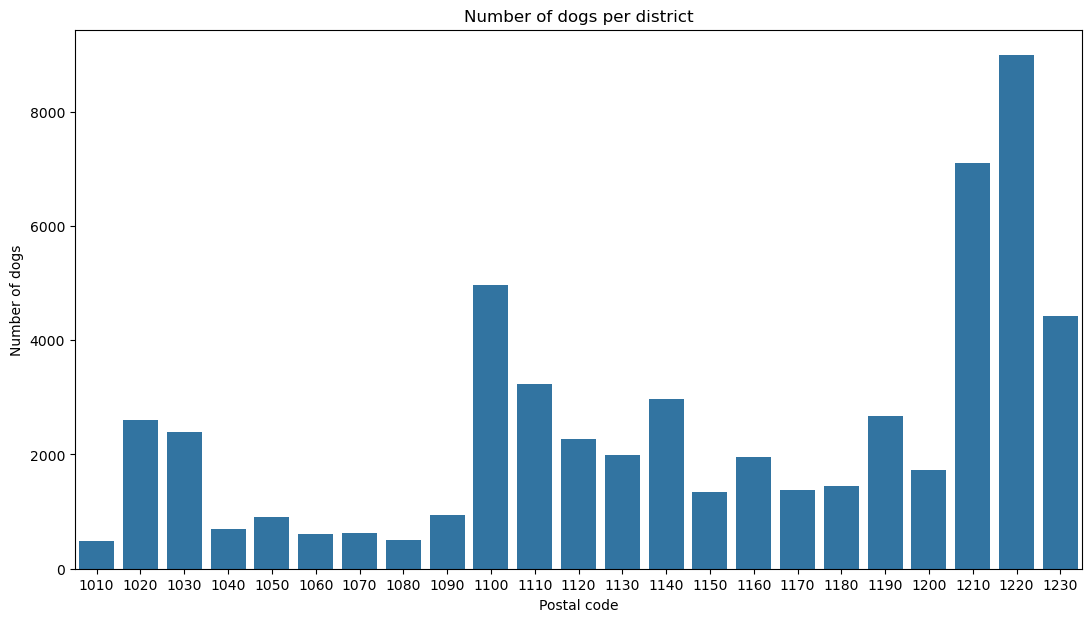

In [62]:
# Barplot
plt.figure(figsize=(12, 8))
ax0 = sns.barplot(
    x=dogs_per_district.index, 
    y=dogs_per_district['number_of_dogs'])

ax0.figure.set_size_inches(13, 7)

plt.title("Number of dogs per district")
plt.xlabel("Postal code")
plt.ylabel("Number of dogs");

#### Group by mixed/purebred

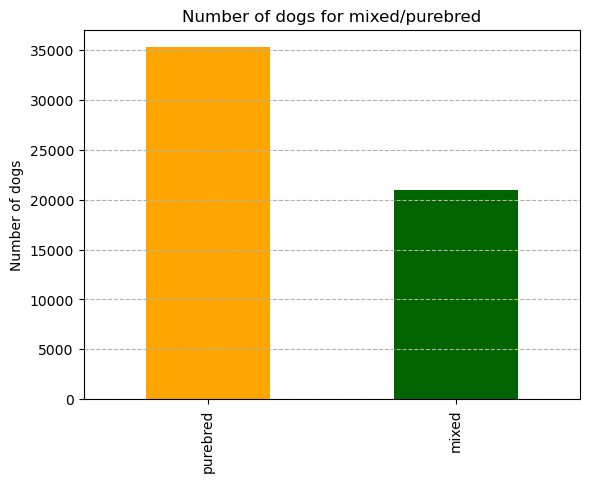

In [63]:
dogs_mixed = df.groupby('mixed_breed')['number_of_dogs'].sum()

# barplot
ax = dogs_mixed.plot(kind='bar', color=['orange', 'darkgreen'])
plt.title('Number of dogs for mixed/purebred')
plt.xlabel(' ')
plt.ylabel('Number of dogs')

# change x-labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['purebred', 'mixed'])
ax.yaxis.grid(linestyle='dashed')

### EDA for additional data sets

In [64]:
#Get paths
dogs_file=os.path.join("cleaned","dogs_cleaned_cc.csv")
parks_file=os.path.join("cleaned","parks_cleaned.csv")
districts_file=os.path.join("cleaned","districts_cleaned_2023.csv")
#Read In
dogs_per_district=pd.read_csv(dogs_file)
parks=pd.read_csv(parks_file)
districts=pd.read_csv(districts_file)

To begin exploring the data, we need to calculate the amount of dogs, then join the additional data sets: 

In [65]:
dogs_per_district = dogs_per_district.groupby(['postal_code', 'district_code'])['number_of_dogs'].sum().reset_index()
dogs_per_district.head()

,postal_code,district_code,number_of_dogs
0,1010,90100,487
1,1020,90200,2597
2,1030,90300,2389
3,1040,90400,700
4,1050,90500,901


In [66]:
# First join on parks with postal codes: 
df_dpd_parks = pd.merge(dogs_per_district, parks, on="postal_code")
df_dpd_parks.head()

,postal_code,district_code,number_of_dogs,green_space(sqm)
0,1010,90100,487,2646
1,1020,90200,2597,550314
2,1030,90300,2389,167372
3,1040,90400,700,41528
4,1050,90500,901,34577


In [67]:
# Second join on districts with district codes: 
df_dpd_parks = pd.merge(df_dpd_parks, districts, on="district_code")

In [68]:
df_dpd_parks.dtypes

postal_code           int64
district_code         int64
number_of_dogs        int64
green_space(sqm)      int64
area                  int64
pop_value             int64
pop_density         float64
dtype: object

We have valid data for all 23 districts. 

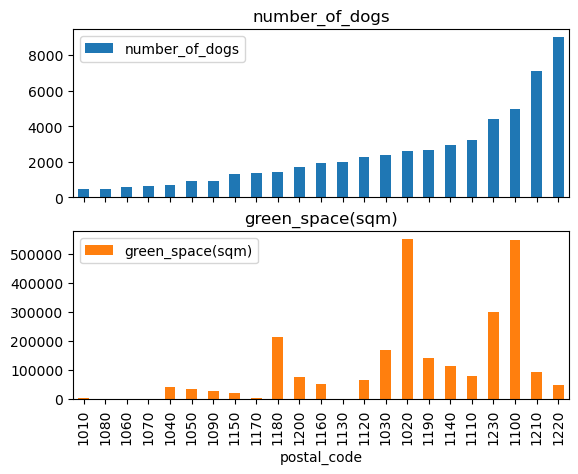

In [69]:
df_dpd_parks.sort_values("number_of_dogs").plot(x="postal_code", y=["number_of_dogs","green_space(sqm)"], kind="bar", subplots=True);

A quick visual exploration of the data shows, that there might be a relationship between available greenspace for dogs and the amount of dogs owned: The districts on the left have no or very litte greenspace and also lesser numbers of dog owners. 

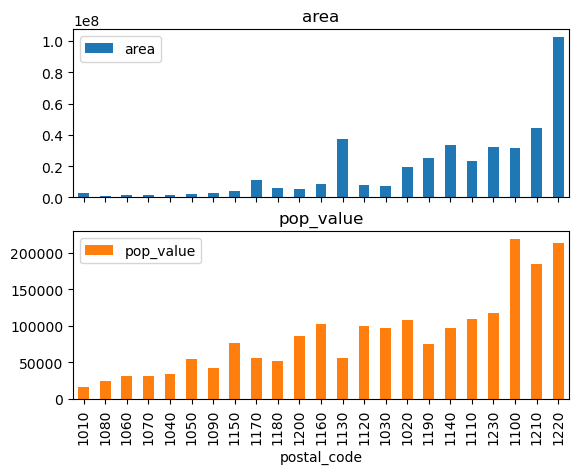

In [70]:
df_dpd_parks.sort_values("number_of_dogs").plot(x="postal_code", y=["area","pop_value"], kind="bar", subplots=True);

When we look at the demographics, these districts are smaller as well and also have less population. This should be accounted for, when looking for correlations.  

Based on these findings we can examine hypothesis H5 in section 3: "Districts with a higher proportion of green space for dogs have more dogs per inhabitant than districts with less green space."

## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate 5 non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test *may* be used to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required.


### E3-H1: "The ratio between the number of dogs and number of residents is higher in the districts situated at the borders of Vienna."
Author: Barbara Ellmenreich


To examine the hypothesis we need the following informations:
- Number of residents per district to calculate the ratio 
- The geometric data for Vienna for the visual analysis

The first information we gather from data.gv.at from the file vie-bez-biz-pop-den-2002f.csv. 

The second information from the file BEZIRKSGRENZEOGD.json.

In [71]:
#loading and cleaning the data for the number of residents per district.
file=os.path.join('cleaned', 'districts_cleaned_2023.csv')
pop_vie= pd.read_csv(file)[['pop_value']]
pop_vie
pop_vie.head()

,pop_value
0,1982097
1,16620
2,108269
3,96756
4,33633


district_code 9000 clearly represents all of Vienna, so we can drop that row.

In [72]:
pop_vie=pop_vie.drop(index=0, axis=0).reset_index(drop=True)

pop_vie.head()

,pop_value
0,16620
1,108269
2,96756
3,33633
4,55018


In [73]:
df_dpd=pd.DataFrame(dogs_per_district).reset_index() #Reading the Data where we already aggregated the number of dogs per district
df_dpd=df_dpd.drop(columns=['index'], axis=1)

In [74]:
df_hyp1=pd.concat((df_dpd,pop_vie,vd),axis=1 ) #joining the three Dataframes for our hypotheses, they can be joined by the index, as they are all sorted by the district codes.

In [75]:
df_hyp1['ratio']=df_hyp1['number_of_dogs']/df_hyp1['pop_value'] # Creating a new column for the ratio dogs to population
df_hyp1=gpd.GeoDataFrame(df_hyp1).reset_index(drop=True) # Turning the joined Dataframe into a Geo Dataframe, to be able to plot a map of vienna.
df_hyp1.head()

,postal_code,district_code,number_of_dogs,pop_value,STATAUSTRIA_BEZ_CODE,geometry,ratio
0,1010,90100,487,16620,901,"POLYGON ((3010.180 342025.230, 2995.920 342041...",0.029302
1,1020,90200,2597,108269,902,"POLYGON ((5298.420 343728.290, 5239.530 343799...",0.023987
2,1030,90300,2389,96756,903,"POLYGON ((4792.732 341000.000, 4790.030 341020...",0.024691
3,1040,90400,700,33633,904,"POLYGON ((3071.798 340143.192, 3048.078 340150...",0.020813
4,1050,90500,901,55018,905,"POLYGON ((2030.550 339801.010, 2024.690 339811...",0.016376


In [76]:
min_ratio=df_hyp1['ratio'].min()
max_ratio=df_hyp1['ratio'].max()
ratio_mean=df_hyp1['number_of_dogs'].sum()/df_hyp1['pop_value'].sum()
print(f'The smallest ratio found is: {min_ratio} \nThe biggest ratio found is: {max_ratio}\nThe average ratio is: {ratio_mean}')

The smallest ratio found is: 0.01637645861354466 
The biggest ratio found is: 0.04225093812600513
The average ratio is: 0.02837348525324442


In [77]:
district_mapping = {90100: 1, 90200: 2, 90300: 3, 90400: 4, 90500: 5, 90600: 6, 90700: 7, 90800: 8,90900: 9, 91000: 10,91100: 11,91200: 12,91300: 13,91400: 14,91500: 15,91600: 16,91700: 17, 91800: 18,91900: 19,92000: 20, 92100: 21, 92200: 22, 92300: 23}
df_hyp1['district_code']=df_hyp1['district_code'].map(district_mapping) #rewriting the district code to a more readable format
df_hyp1['boundary_districts']=df_hyp1.apply(boundary,axis=1) #
df_hyp1.head()

,postal_code,district_code,number_of_dogs,pop_value,STATAUSTRIA_BEZ_CODE,geometry,ratio,boundary_districts
0,1010,1,487,16620,901,"POLYGON ((3010.180 342025.230, 2995.920 342041...",0.029302,0
1,1020,2,2597,108269,902,"POLYGON ((5298.420 343728.290, 5239.530 343799...",0.023987,0
2,1030,3,2389,96756,903,"POLYGON ((4792.732 341000.000, 4790.030 341020...",0.024691,0
3,1040,4,700,33633,904,"POLYGON ((3071.798 340143.192, 3048.078 340150...",0.020813,0
4,1050,5,901,55018,905,"POLYGON ((2030.550 339801.010, 2024.690 339811...",0.016376,0


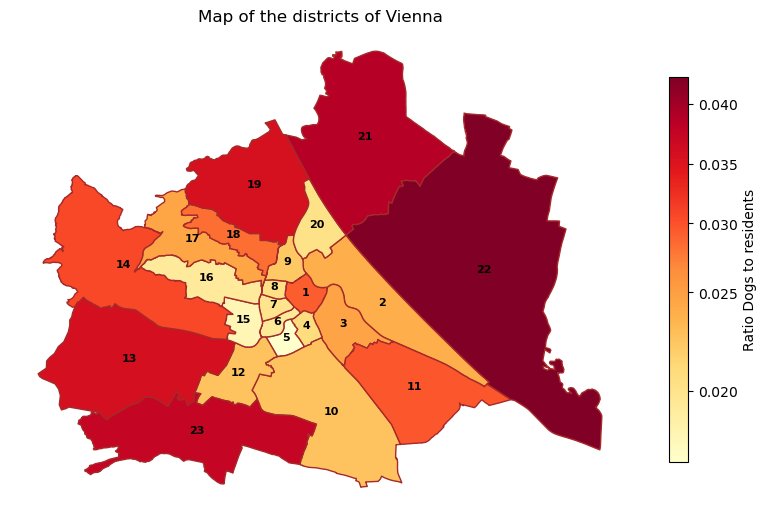

In [78]:
#Visualisation of the data to analyse the hypothesis.

fig, ax = plt.subplots(figsize=(10, 10))
df_hyp1.plot(column='ratio', cmap='YlOrRd',ax=ax, legend=True, 
             norm=matplotlib.colors.TwoSlopeNorm(vmin=df_hyp1.ratio.min(), vcenter=df_hyp1.ratio.mean(),vmax=df_hyp1.ratio.max()),figsize=(6,6), edgecolor='brown', legend_kwds={"orientation": "vertical","shrink":0.5,"label":"Ratio Dogs to residents"})
df_hyp1.apply(lambda x: ax.annotate(text=x['district_code'], xy=x.geometry.centroid.coords[0], ha='center',size=8, weight='bold'), axis=1)
ax.axis('off')
ax.set_title('Map of the districts of Vienna')
path=os.path.join('report_images', 'Hyp1_Fig1.png')
plt.savefig(path,format='png');

The ratio describes the number of dogs per resident. For example: A ratio of 0.02 represents 0.02 dogs per resident in the represented area.

As the darker Red Colors indicate a higher Ratio of dogs per resident, it is at first glance already clear, that the districts at the borders of Vienna tend to have a darker color than the other districts.

Especially 1220, 1210, 1190, 1130 and 1230 have the darker colors and therefore the highest ratios.

It is surprising to see, that the first district (1010), apperently has quite a high ratio considering that it is in the middle of Vienna, while the 5th District hast the lowest by far, seeing as the color is almost white.

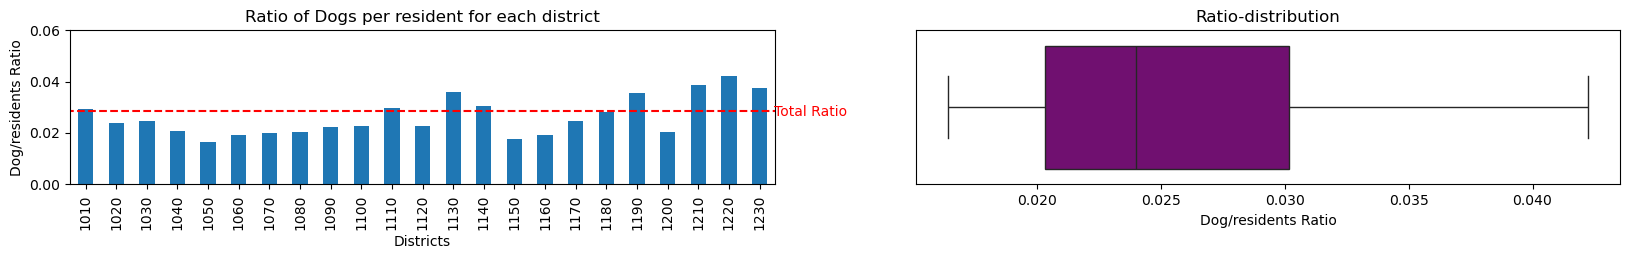

In [79]:
#Another visualisation of the ratio per district
fig,ax=plt.subplots(ncols=2,figsize=(20,2))
df_hyp1.plot(kind='bar',x='postal_code', y='ratio',legend=False, ax=ax[0])
ax[0].hlines(ratio_mean, -1, len(df_hyp1['postal_code']), color='r', linestyles='dashed')
ax[0].text(25,ratio_mean, 'Total Ratio ', ha='right', va='center', color='r')
ax[0].set_ylim(0,.06)
ax[0].set_xlabel('Districts')
ax[0].set_ylabel('Dog/residents Ratio')
ax[0].set_title('Ratio of Dogs per resident for each district')

sns.boxplot(x=df_hyp1['ratio'], color='purple',ax=ax[1])
ax[1].set_xlabel('Dog/residents Ratio')
ax[1].yaxis.set_ticks([])
ax[1].set_title('Ratio-distribution')
path=os.path.join('report_images', 'Hyp1_Fig2.png')
plt.savefig(path,format='png');



In the left plot, you can see the average ratio per district, indicated by the bars, and  over all of Vienna, indicated by the dashed red line. In the right plot you can see the distribution of the ratio.

As visible in the two visualizations there are no extreme outliers in the ratio within the districts.

But most of the districts are concetrated in the lower half of the ratio-intervall, as seen in the boxplot. The purple box consists auf the middle 50% of the values, while the line indicates the Median and the right border of the box is the 75-percentile.

So while there is a distinction between the districts, it is not an extrem distinction.


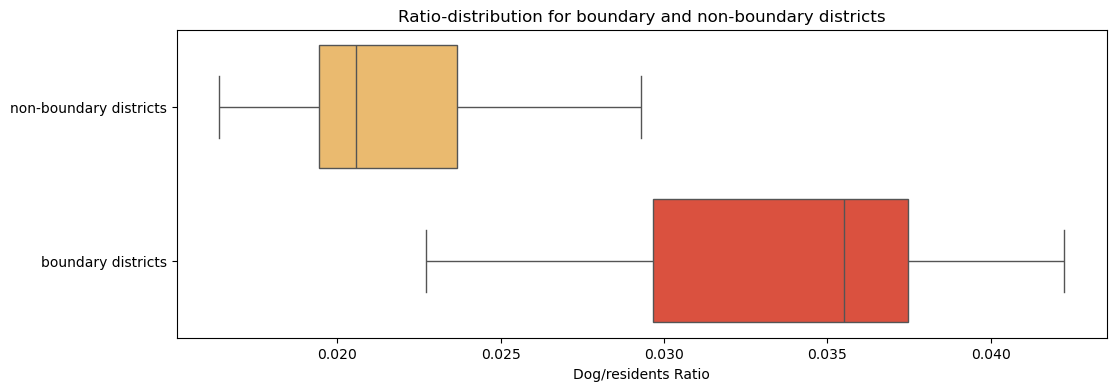

In [80]:
fig, ax = plt.subplots(figsize=(12, 4))
ax=sns.boxplot(x=df_hyp1['ratio'], y=df_hyp1['boundary_districts'].replace({'0':'non-boundary districts','1':'boundary districts'}), hue=df_hyp1['boundary_districts'].replace({'0':'non-boundary districts','1':'boundary districts'}), palette='YlOrRd')
ax.set_xlabel('Dog/residents Ratio')
ax.set_ylabel('')
ax.set_title('Ratio-distribution for boundary and non-boundary districts')
path=os.path.join('report_images', 'Hyp1_Fig3.png')
plt.savefig(path,format='png');

In this plot one can again see the clear distinction between boundary and non-boundary districts. The boundary district clearly have a higher ration in average, than the non-boundary districts.

They also apparently have a higher distribution as seen by the length of the  individual boxplots.

#### Fazit

The boundary districts clearly tend to have a higher ratio of dogs per resident. Though they do not differ very highly. The range is between 0.017 to 0.044 dogs per resident.

The boundary districts range between a ratio of around 0.024 and 0.44, while the non-boundary districts range between a ratio of 0.017 and 0.031.

All in all our initial hypothesis is proven true.

#### Real Life Use Cases and Consequences

According to an the article ["Hundesheriffs im Anmarsch: Im Februar startet das "Wiener Hunde-Team""](https://kurier.at/chronik/wien/hundesheriffs-im-anmarsch-im-februar-startet-das-wiener-hunde-team/402699622) in **Kurier**, starting with February, the city of Vienna will send teams of employees from the MA 60 (The Magistrate department for the veterinary office and animal wellfare), to check if all rules and mandates are followed and if there are any issues with dogs in the area.

With the results of the hypothesis one could suggest to have more or bigger teams in the boundary districts, aswell as maybe more offices.

### E3-H2: "In outer districts the proportion of mixed-breed dogs is higher compared to purebred dogs."
Author: Kathrin Schumich



#### Grouped by inner/outer districts

In [81]:
# Create a contingency table
contingency_table = pd.crosstab(
    index=df['inner_district'].replace({0: 'outer district', 1: 'inner district'}),
    columns=df['mixed_breed'].replace({0: 'purebred', 1: 'mixed'}),
    values=df['number_of_dogs'],  
    aggfunc='sum',  
    margins=True,
    margins_name='Total'
).rename_axis(index=None, columns=None)

contingency_table

,mixed,purebred,Total
inner district,3708,6046,9754
outer district,17291,29194,46485
Total,20999,35240,56239


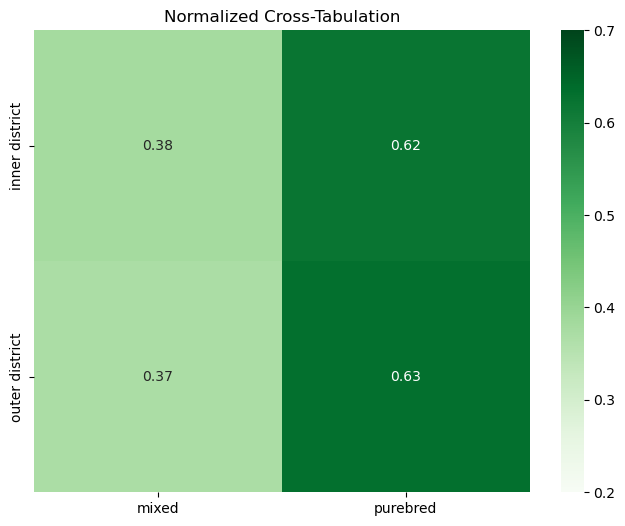

In [82]:
# Create a contingency table with normalized values
contingency_table2 = pd.crosstab(
    index=df['inner_district'].replace({0: 'outer district', 1: 'inner district'}),
    columns=df['mixed_breed'].replace({0: 'purebred', 1: 'mixed'}),
    values=df['number_of_dogs'], 
    aggfunc='sum',  
    normalize='index'
).round(2)

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table2, annot=True, cmap='Greens', cbar=True, fmt=".2f", vmin=0.2, vmax=0.7)
plt.title('Normalized Cross-Tabulation')
plt.xlabel('')
plt.ylabel('')
path=os.path.join('report_images', 'Hyp2_Fig1.png')
plt.savefig(path,format='png');

#### Grouped by district

In [83]:
# Create a contingency table
contingency_table3 = pd.crosstab(
    index=df['postal_code'],
    columns=df['mixed_breed'].replace({0: 'purebred', 1: 'mixed'}),
    values=df['number_of_dogs'], 
    aggfunc='sum',  
    margins=True,
    margins_name='Total'
).rename_axis(index=None, columns=None)

contingency_table3.head()

,mixed,purebred,Total
1010,154,333,487
1020,1026,1571,2597
1030,861,1528,2389
1040,271,429,700
1050,353,548,901


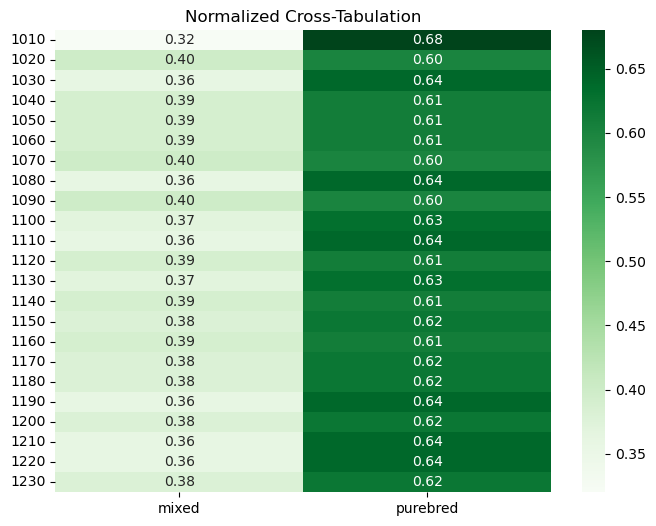

In [84]:
# Create a contingency table with normalized values
contingency_table4 = pd.crosstab(
    index=df['postal_code'],
    columns=df['mixed_breed'].replace({0: 'purebred', 1: 'mixed'}),
    values=df['number_of_dogs'],  
    aggfunc='sum',  
    normalize='index'
).round(2)

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table4, annot=True, cmap='Greens', cbar=True, fmt=".2f")
plt.title('Normalized Cross-Tabulation')
plt.xlabel('')
plt.ylabel('')
path=os.path.join('report_images', 'Hyp2_Fig2.png')
plt.savefig(path,format='png');

#### Results

The result of the analysis indicates that there are not more mixed dogs (proportionally) in outer districts than purebred dogs. This can be seen in the first part, where we looked at the proportion, grouped only by inner/outer districts. Only 36% of the dogs in the outer districts are mixed, while  64% are purebred. The same conclusion is obtained in the second part, where we looked at the proportions for each district individually. In every district, which is classified as "outer district" (districts 10-23), the proportion for mixed dogs is significantly lower than the proportion for purebred dogs. 

Furthermore, it can be observed that the highest proportion of purebred dogs (70%) is in the first district.

Finally, it can be concluded that the results do not support the hypothesis, and as such, it can be rejected.

#### Real life application

The article ["Owner perceived differences between mixed-breed and purebred dogs"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5319786/#:~:text=Several%20studies%20have%20detected%20behavioural,breeds%20than%20in%20purebred%20dogs) discusses differences in the behavior of mixed-breed and purebred dogs. It was found that mixed-breed dogs are generally considered to be healthier and may have longer lifespans, as purebred dogs are more susceptible to genetic diseases. Combining the results of this paper with the findings from hypothesis 2, one could suggest to expand the presence of veterinarians specializing in hereditary conditions - as purebreds are notably more susceptible to genetic diseases - to ensure early detection, tailored treatment, and improved overall well-being for these dogs. 

### E3-H3: "Districts with a higher number of houesholds with children are more likely to have more dogs than those with fewer."
Author: Jasia Alam


To examine the hypothesis we need the following informations:
- Number of residents per district to calculate the ratio (min-max)
- The geometric data for Vienna for the visual analysis 
- Number of households with a child for Vienna per district to make the comparison for the hypothesis. 

The first information we gather from data.gv.at from the file vie-bez-biz-pop-den-2002f.csv. 
The second information from the file BEZIRKSGRENZEOGD.json.
The last information we gather from data.gv.at from the file vie-bez-fam-typ-2012f.csv.

#### Grouped by households with children

In [85]:
dogs_file=os.path.join('cleaned', 'dogs_cleaned_cc.csv')
df=pd.read_csv(dogs_file)

In [86]:
pop_file=os.path.join('cleaned', 'pop_total_2023.csv')
pop_total_2023=pd.read_csv(pop_file)

#### Grouped by households with child and ratio added per residets (district-wise)

In [87]:
fam_pop_df = pd.merge(fam_total_2021, pop_total_2023, on='DISTRICT_CODE')

fam_pop_df['POP_VALUE'] = pd.to_numeric(fam_pop_df['POP_VALUE'].str.replace('.', ''), errors='coerce')
fam_pop_df['RATIO_FAM_POP'] = fam_pop_df['TOTAL']/fam_pop_df['POP_VALUE'] 

fam_pop_df = fam_pop_df[['DISTRICT_CODE', 'TOTAL', 'POP_VALUE', 'RATIO_FAM_POP']]
fam_pop_df.head()

,DISTRICT_CODE,TOTAL,POP_VALUE,RATIO_FAM_POP
0,90100,2260,16620,0.135981
1,90200,14625,108269,0.135080
2,90300,12901,96756,0.133335
3,90400,4373,33633,0.130021
4,90500,6668,55018,0.121197


#### Setting geometry for the map of vienna

In [88]:
df_dpd=gpd.GeoDataFrame(dogs_per_district).reset_index(drop=True)#resetting the index and overgiving geodf in order to work with it later on
df_dpd.head()

,postal_code,district_code,number_of_dogs
0,1010,90100,487
1,1020,90200,2597
2,1030,90300,2389
3,1040,90400,700
4,1050,90500,901


In [89]:
df_hyp3_child=pd.concat((fam_pop_df,vd),axis=1)
df_hyp3_child = gpd.GeoDataFrame(df_hyp3_child)
df_hyp3_child.head()

,DISTRICT_CODE,TOTAL,POP_VALUE,RATIO_FAM_POP,STATAUSTRIA_BEZ_CODE,geometry
0,90100,2260,16620,0.135981,901,"POLYGON ((3010.180 342025.230, 2995.920 342041..."
1,90200,14625,108269,0.135080,902,"POLYGON ((5298.420 343728.290, 5239.530 343799..."
2,90300,12901,96756,0.133335,903,"POLYGON ((4792.732 341000.000, 4790.030 341020..."
3,90400,4373,33633,0.130021,904,"POLYGON ((3071.798 340143.192, 3048.078 340150..."
4,90500,6668,55018,0.121197,905,"POLYGON ((2030.550 339801.010, 2024.690 339811..."


#### Calculating min-max-ratio for children in households

In [90]:
district_mapping = {90100: 1, 90200: 2, 90300: 3, 90400: 4, 90500: 5, 90600: 6, 90700: 7, 90800: 8,90900: 9, 91000: 10,91100: 11,91200: 12,91300: 13,91400: 14,91500: 15,91600: 16,91700: 17, 91800: 18,91900: 19,92000: 20, 92100: 21, 92200: 22, 92300: 23}

df_hyp3_child['DISTRICT_CODE'] = df_hyp3_child['DISTRICT_CODE'].map(district_mapping)
min_ratio=df_hyp3_child['RATIO_FAM_POP'].min()
max_ratio=df_hyp3_child['RATIO_FAM_POP'].max()
df_hyp3_child['Min_Maxed_Ratio_Child'] = (df_hyp3_child['RATIO_FAM_POP']-min_ratio)/(max_ratio-min_ratio)
df_hyp3_child.head()


,DISTRICT_CODE,TOTAL,POP_VALUE,RATIO_FAM_POP,STATAUSTRIA_BEZ_CODE,geometry,Min_Maxed_Ratio_Child
0,1,2260,16620,0.135981,901,"POLYGON ((3010.180 342025.230, 2995.920 342041...",0.473872
1,2,14625,108269,0.135080,902,"POLYGON ((5298.420 343728.290, 5239.530 343799...",0.452414
2,3,12901,96756,0.133335,903,"POLYGON ((4792.732 341000.000, 4790.030 341020...",0.410839
3,4,4373,33633,0.130021,904,"POLYGON ((3071.798 340143.192, 3048.078 340150...",0.331867
4,5,6668,55018,0.121197,905,"POLYGON ((2030.550 339801.010, 2024.690 339811...",0.121602


In [91]:
df['district_code'] = df['district_code'].map(district_mapping)
df.head()

,district_code,postal_code,dog_breed,number_of_dogs,inner_district,mixed_breed,boundary_districts
0,1,1010,Akita / Belgischer Schäferhund,1,1,1,0
1,1,1010,American Cocker Spaniel,2,1,0,0
2,1,1010,American Cocker Spaniel / Pudel,1,1,1,0
3,1,1010,American Staffordshire Terrier,1,1,0,0
4,1,1010,Australian Shepherd,5,1,0,0


#### Group by total number of dogs (district-wise)

In [92]:
sum_dogs_per_district = df.groupby('district_code')['number_of_dogs'].sum().reset_index()

sum_dogs_per_district.columns = ['district_code', 'total_dogs']
sum_dogs_per_district.head()

,district_code,total_dogs
0,1,487
1,2,2597
2,3,2389
3,4,700
4,5,901


In [93]:
pop_value_2023 = df_2023[['DISTRICT_CODE', 'POP_VALUE']].reset_index(drop=True)

pop_value_2023['DISTRICT_CODE'] = pop_value_2023['DISTRICT_CODE'].map(district_mapping)
pop_value_2023['DISTRICT_CODE'] = pop_value_2023['DISTRICT_CODE'].replace({np.nan: -1, np.inf: -1, -np.inf: -1})
pop_value_2023['DISTRICT_CODE'] = pop_value_2023['DISTRICT_CODE'].astype(int)
pop_value_2023.head()


,DISTRICT_CODE,POP_VALUE
0,-1,1.982.097
1,1,16.620
2,2,108.269
3,3,96.756
4,4,33.633


In [94]:
dog_pop_df = pd.merge(sum_dogs_per_district, pop_value_2023, left_on='district_code', right_on='DISTRICT_CODE')

dog_pop_df['POP_VALUE'] = pd.to_numeric(dog_pop_df['POP_VALUE'].str.replace('.', ''), errors='coerce')
dog_pop_df['RATIO_DOG_POP'] = dog_pop_df['total_dogs'] / dog_pop_df['POP_VALUE']#looking at the ratio of dogs per poplation 

dog_pop_df = dog_pop_df[['district_code', 'total_dogs', 'POP_VALUE', 'RATIO_DOG_POP']]
dog_pop_df.head()


,district_code,total_dogs,POP_VALUE,RATIO_DOG_POP
0,1,487,16620,0.029302
1,2,2597,108269,0.023987
2,3,2389,96756,0.024691
3,4,700,33633,0.020813
4,5,901,55018,0.016376


#### Calculating min-max-ratio 

In [95]:
df_hyp3_dog=pd.concat((dog_pop_df,vd),axis=1)
df_hyp3_dog = gpd.GeoDataFrame(df_hyp3_dog)
min_ratio=df_hyp3_dog['RATIO_DOG_POP'].min()
max_ratio=df_hyp3_dog['RATIO_DOG_POP'].max()
df_hyp3_dog['Min_Maxed_Ratio_Dog'] = (df_hyp3_dog['RATIO_DOG_POP']-min_ratio)/(max_ratio-min_ratio)#calculating min max ratio to norm it
df_hyp3_dog.head()

,district_code,total_dogs,POP_VALUE,RATIO_DOG_POP,STATAUSTRIA_BEZ_CODE,geometry,Min_Maxed_Ratio_Dog
0,1,487,16620,0.029302,901,"POLYGON ((3010.180 342025.230, 2995.920 342041...",0.499550
1,2,2597,108269,0.023987,902,"POLYGON ((5298.420 343728.290, 5239.530 343799...",0.294116
2,3,2389,96756,0.024691,903,"POLYGON ((4792.732 341000.000, 4790.030 341020...",0.321340
3,4,700,33633,0.020813,904,"POLYGON ((3071.798 340143.192, 3048.078 340150...",0.171460
4,5,901,55018,0.016376,905,"POLYGON ((2030.550 339801.010, 2024.690 339811...",0.000000


#### Compare frequency of children and dogs in households (district by district)

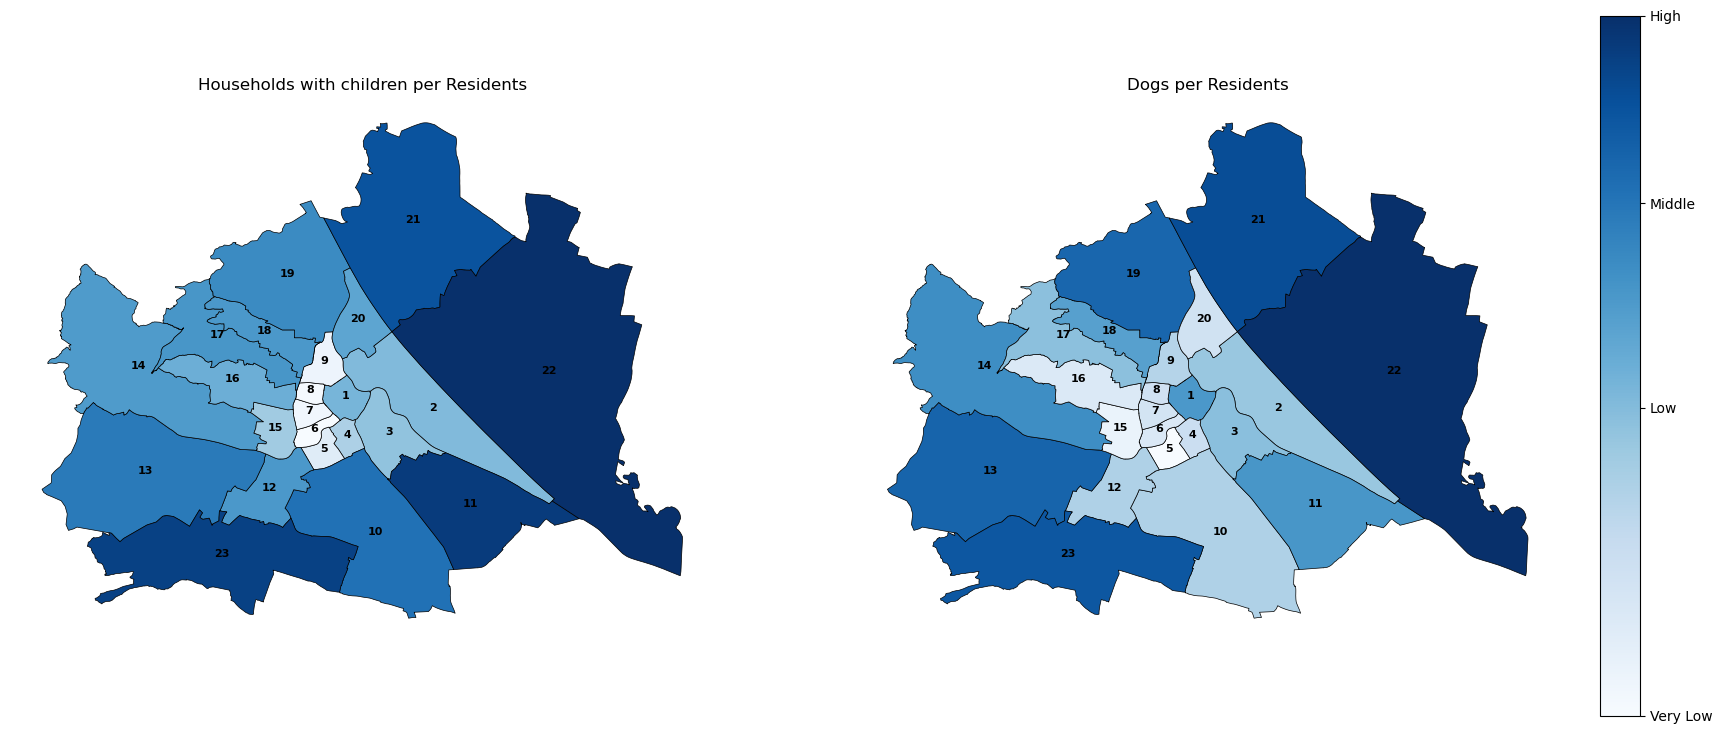

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Dogs per Population Ratio with Min_Maxed_Ratio
norm1 = matplotlib.colors.TwoSlopeNorm(vmin=df_hyp3_child['Min_Maxed_Ratio_Child'].min(),
                                       vcenter=df_hyp3_child['Min_Maxed_Ratio_Child'].mean(),
                                       vmax=df_hyp3_child['Min_Maxed_Ratio_Child'].max())
plot1 = df_hyp3_child.plot(column='Min_Maxed_Ratio_Child', cmap='Blues', ax=axes[0], edgecolor='black', linewidth=0.5, norm=norm1)
df_hyp3_child.apply(lambda x: axes[0].annotate(text=x['DISTRICT_CODE'], xy=x.geometry.centroid.coords[0], ha='center', size=8, weight='bold'), axis=1)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Households with children per Residents')

# Plot 2: New Ratio (total_dogs / POP_VALUE) with Min_Maxed_Ratio
norm2 = matplotlib.colors.TwoSlopeNorm(vmin=df_hyp3_dog['Min_Maxed_Ratio_Dog'].min(),
                                       vcenter=df_hyp3_dog['Min_Maxed_Ratio_Dog'].mean(),
                                       vmax=df_hyp3_dog['Min_Maxed_Ratio_Dog'].max())
plot2 = df_hyp3_dog.plot(column='Min_Maxed_Ratio_Dog', cmap='Blues', ax=axes[1], edgecolor='black', linewidth=0.5, norm=norm2)
df_hyp3_dog.apply(lambda x: axes[1].annotate(text=x['district_code'], xy=x.geometry.centroid.coords[0], ha='center', size=8, weight='bold'), axis=1)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Dogs per Residents')


cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
legend_intervals = np.arange(0, 1.1, 0.1)
cbar = fig.colorbar(plot2.get_children()[0], cax=cbar_ax, ticks=legend_intervals)


custom_legend_labels = ['Very Low', 'Low', 'Middle', 'High']#setting custom labels since this makes more sense here 
cbar.set_ticks(np.linspace(legend_intervals.min(), legend_intervals.max(), len(custom_legend_labels)))

cbar.set_ticklabels(custom_legend_labels)
path=os.path.join('report_images', 'Hyp3_Fig1.png')
fig.savefig(path,format='png');


#### Analysis and results of the plots

##### Plot Households with children per Residents 
We can see in the left plot that the districts 22, 12 and 23 have the most households with children with them followed by the districts 21, 10 and 13. We can see a trend, that those districts are situated at the border of vienna 
geographically and by far the biggest districts per km^2. One can think that this can be the cause for the higher number of households situated there with children, since those households need in general more space than. In 
addition, one can also assume since the inner districts are more desiable districts to get an apartment, due to the central aread, the rent is a lot higher and those prices are not managable with a child/children since children are
expensive to have. 

##### Plot Dogs per Residents 
On the right plot we can see that the districts 23, 21, 19, 13 and 23 are the most densily situated districts with dogs. Therefore, we can make the same assumption that this could be because of the cheaper rent price, bigger 
km^2 of those districts. 

##### Comparison of households with children/dogs
We can cleary see that there is a similiar trend for the residency of dogs and children, both attributes are more frequently situated in the other district (21,22,19,23,12) and nearly none in the inner districts (5,6,7,8,9).

Possible reasons
* cheaper rent 
* more rural area 
* better facilities (play grounds, dog parks, etc.)

Differences can be noted in the district situated in the middle of Vienna in the districts (15,16,12,3,2,20) , situated next to the centre of vienna, this can be explained by the various living options given in those districts.
There are several areas which are more accessible for families, dog-owners, parents, and areas, which have better facilies for students, single households and couples without children. Since those districts are near schools,
universities, but do not have the biggest apartments.                                                                                                                                                                                                                                

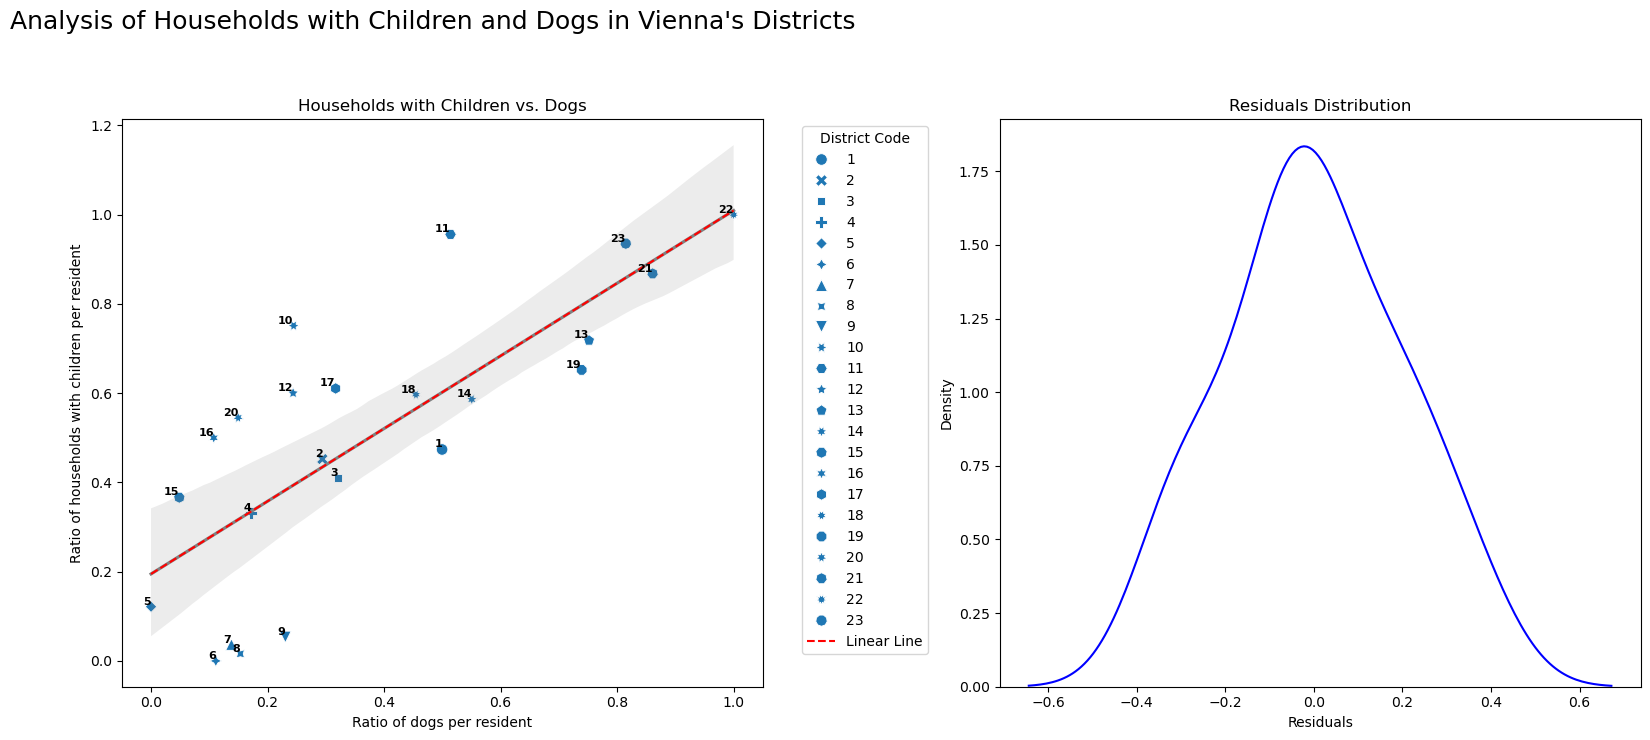

In [97]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
scatter = sns.scatterplot(x=df_hyp3_dog["Min_Maxed_Ratio_Dog"], y=df_hyp3_child["Min_Maxed_Ratio_Child"], style=df_hyp3_child["DISTRICT_CODE"], s=70, ax=axs[0])#ploting the scatterplot here

#Fit a linear regression model
X = sm.add_constant(df_hyp3_dog["Min_Maxed_Ratio_Dog"])
y = df_hyp3_child["Min_Maxed_Ratio_Child"]
model = sm.OLS(y, X).fit()#ols fit

sns.regplot(x=df_hyp3_dog["Min_Maxed_Ratio_Dog"], y=df_hyp3_child["Min_Maxed_Ratio_Child"], scatter=False, color='gray', ax=axs[0], ci=95)

min_max_ratio_dog_range = np.linspace(df_hyp3_dog["Min_Maxed_Ratio_Dog"].min(), df_hyp3_dog["Min_Maxed_Ratio_Dog"].max(), 100)
linear_line = model.params['const'] + model.params['Min_Maxed_Ratio_Dog'] * min_max_ratio_dog_range#setting linear line here 
axs[0].plot(min_max_ratio_dog_range, linear_line, linestyle='dashed', color='red', label='Linear Line')

for i, txt in enumerate(df_hyp3_child['DISTRICT_CODE']):
    axs[0].annotate(txt, (df_hyp3_dog['Min_Maxed_Ratio_Dog'].iloc[i], df_hyp3_child['Min_Maxed_Ratio_Child'].iloc[i]), ha='right', va='bottom', size=8, weight='bold')

axs[0].set_xlabel("Ratio of dogs per resident")#setting all labels for axis 
axs[0].set_ylabel("Ratio of households with children per resident")
axs[0].set_title("Households with Children vs. Dogs")
axs[0].legend(title="District Code", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

residuals = y - model.predict(X) #calculating the residuals to show the differences better 
residuals.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.kdeplot(residuals, color='blue', ax=axs[1])#setting labels for all axis 
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Density")
axs[1].set_title("Residuals Distribution")

plt.suptitle("Analysis of Households with Children and Dogs in Vienna's Districts", fontsize=18, y=1.05, ha='right')

fig.align_ylabels(axs[:])
plt.tight_layout()

plt.show()
path=os.path.join('report_images', 'Hyp3_Fig2.png')
fig.savefig(path,format='png'); #save it for our report

#### Results

In this plot one can again see the an existing correlation between districts with a higher ratio of households with children and higher ratio of households with dogs. The trends for the outer and inner-central districts are the same for 
households with children and dogs per residents. 

As we can see in the plot above there is a correlation between the frequency of children and dogs in districts, but it is not a perfect correlation.This can be seen in the residual distribution plot since it scattered around 0. 

#### Real life application

The article "Tipps und Regeln, wie Hund und Kind eine enge Freundschaft entwickeln" https://www.fressnapf.at/magazin/hund/erziehung/hund-kind/ discusses how children want a dog as a companion. Since the dog and children need a lot of space one can suggest to consider this factor in the planing of the new apartments in the more frequent populated districts. The doors can be bigger and others factors which count in the necessary steps for dog and child in the home facility. 

In addition, many childcare facilties can think about a joint care facility were dogs and child are supervised next to each other. This can help the residents to have a supervisor for both pet and child. Moreover, relationship with children and dogs increase several valuable lessons just as mentioned in the article. 

The city counsil can take those factors into consideration in the mentioned districts with more kids/dogs.


### E3-H4: "Higher-income districts are more likely to have purebred dogs than Lower-income districts."
Author: Yosef Abd EL-Hamid

Data Sources:
Information for the average income per district <br>
(https://www.data.gv.at/katalog/de/dataset/vie-bez-biz-ecn-inc-sex-2002f#resources )

In [98]:
income_file=os.path.join('cleaned', 'income.csv')
dogs_file=os.path.join('cleaned', 'dogs_cleaned_cc.csv')
df11 = pd.read_csv(income_file)
df22 = pd.read_csv(dogs_file)
merged_df = pd.merge(df11, df22, on='district_code', how='inner')

In [99]:
merged_df.head()

,district_code,ref_year,inc_tot_value,postal_code,dog_breed,number_of_dogs,inner_district,mixed_breed,boundary_districts
0,90100,2021,37250,1010,Akita / Belgischer Schäferhund,1,1,1,0
1,90100,2021,37250,1010,American Cocker Spaniel,2,1,0,0
2,90100,2021,37250,1010,American Cocker Spaniel / Pudel,1,1,1,0
3,90100,2021,37250,1010,American Staffordshire Terrier,1,1,0,0
4,90100,2021,37250,1010,Australian Shepherd,5,1,0,0


In [100]:
quartiles = merged_df['inc_tot_value'].quantile([0, 0.25, 0.5, 0.75, 1])
quartiles

0.00    20866.0
0.25    22629.0
0.50    26571.0
0.75    27450.0
1.00    37250.0
Name: inc_tot_value, dtype: float64

In [101]:
# Classification into income classes
merged_df['income_classes'] = pd.cut(merged_df['inc_tot_value'],
                                     bins=quartiles,
                                     labels=['Very Low Income ', 'Lower Income', 'High Income ', 'Very High Income'])


merged_df['mixed_breed']=merged_df['mixed_breed'].astype(str)
merged_df.head()


,district_code,ref_year,inc_tot_value,postal_code,dog_breed,number_of_dogs,inner_district,mixed_breed,boundary_districts,income_classes
0,90100,2021,37250,1010,Akita / Belgischer Schäferhund,1,1,1,0,Very High Income
1,90100,2021,37250,1010,American Cocker Spaniel,2,1,0,0,Very High Income
2,90100,2021,37250,1010,American Cocker Spaniel / Pudel,1,1,1,0,Very High Income
3,90100,2021,37250,1010,American Staffordshire Terrier,1,1,0,0,Very High Income
4,90100,2021,37250,1010,Australian Shepherd,5,1,0,0,Very High Income


#### Income classes
- Very Low Income  ( 20866.0 Euro    -   22629.0  Euro )
- Lower Income     ( 22629.0 Euro    -   26571.0  Euro )
- High Income      ( 26571.0 Euro    -   27450.0  Euro )
- Very High Income ( 27450.0 Euro    -   37250.0  Euro )

#### Plot distribution of Mixed Breeds across average income classes

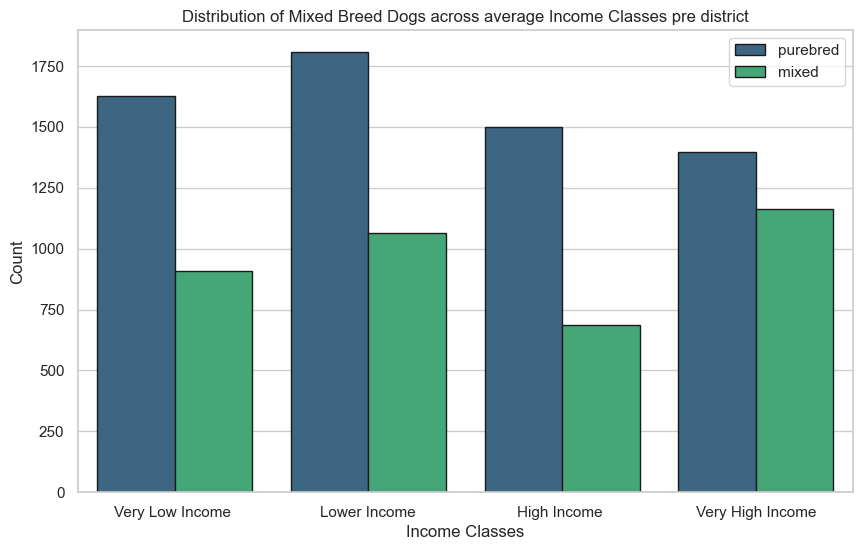

In [102]:
sns.set(style="whitegrid")

fig=plt.figure(figsize=(10, 6))
sns.countplot(x='income_classes', hue='mixed_breed', data=merged_df, palette='viridis', edgecolor='k')
plt.title('Distribution of Mixed Breed Dogs across average Income Classes pre district')
plt.xlabel('Income Classes')
plt.ylabel('Count')
plt.legend(title='', labels=['purebred', 'mixed'],loc='upper right');
plt.show()
path=os.path.join('report_images', 'Hyp4_Fig1.png')
fig.savefig(path,format='png');

#### Plot Heatmap of Percentages

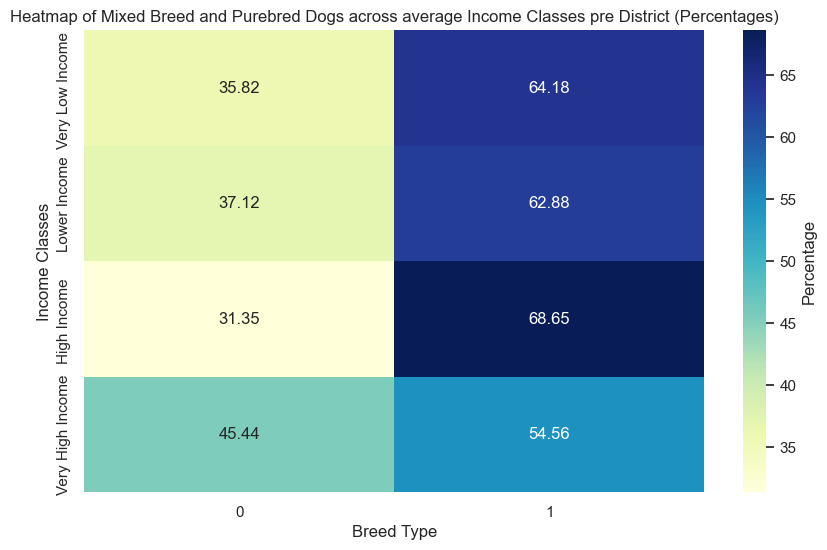

In [103]:
merged_df['mixed_breed'] = merged_df['mixed_breed'].replace({0: 'Purebred', 1: 'Mixed Breed'})


pivot_table_counts = pd.pivot_table(merged_df, values='number_of_dogs', index='income_classes', columns='mixed_breed', aggfunc='count', fill_value=0)


pivot_table_percentages = pivot_table_counts.div(pivot_table_counts.sum(axis=1), axis=0) * 100


sns.set(style="whitegrid")


fig=plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentages, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Mixed Breed and Purebred Dogs across average Income Classes pre District (Percentages)')
plt.xlabel('Breed Type')
plt.ylabel('Income Classes')
plt.show()
path=os.path.join('report_images', 'Hyp4_Fig2.png')
fig.savefig(path,format='png');

#### Results

Looking at the heatmap, it seems like how much money people make doesn't really affect whether they have purebred or mixed-breed dogs. For example, very high income have about 45.61% purebred dogs, and those with a high income have a bit less, around 31.44%. On the other hand, people with lower incomes and very low incomes have percentages of 37.25% and 35.94%, respectively, for having purebred dogs. So, it looks like how much money someone has doesn't strongly influence whether they have a purebred or mixed-breed dog.


### E3-H5: "Districts with a higher proportion of green space for dogs have more dogs per inhabitant than districts with less green space."
Author: Michaela Hubweber 

Data Sources: 
* Parkanlagen Standorte Wien, Magistrat Wien - Magistratsabteilung 42 - Wiener Stadtgärten <br> https://www.data.gv.at/katalog/dataset/22add642-d849-48ff-9913-8c7ba2d99b46#additional-info <br> Used File version: PARKINFOOGD.csv (Downloaded: 02.01.2024)
* Bevölkerungsdichte seit 2002 - Bezirke Wien, Magistrat Wien - Magistratsabteilung 23 - Wirtschaft, Arbeit und Statistik <br> https://www.data.gv.at/katalog/dataset/dc56ea9e-57be-47d5-ab50-d1e74fda7118 <br> Used File version: vie-bez-biz-pop-den-2002f.csv (Downloaded: 02.01.2024)

Related Literature: 
* Purtscher, Mag Clemens. "Tiergerechte Hundehaltung und Auslaufmöglichkeiten in Wien." Kapitel 8, pp.40, Online: https://sloughi.blogger.de/static/antville/sloughi/files/hundestudie.pdf (Accessed: 02.01.2024)

To validate our hypothesis we first calculate some ratios, dogs per capita and greenspace per total area (in percent)

In [104]:
# Calculate ratios: 
df_dpd_parks["dogs_per_capita"]=df_dpd_parks["number_of_dogs"]/df_dpd_parks["pop_value"]
df_dpd_parks["greenspace_pct"]=df_dpd_parks["green_space(sqm)"]/df_dpd_parks["area"]*100
df_dpd_parks.head()

,postal_code,district_code,number_of_dogs,green_space(sqm),area,pop_value,pop_density,dogs_per_capita,greenspace_pct
0,1010,90100,487,2646,2870000,16620,5793.42,0.029302,0.092195
1,1020,90200,2597,550314,19240000,108269,5626.70,0.023987,2.860260
2,1030,90300,2389,167372,7400000,96756,13079.13,0.024691,2.261784
3,1040,90400,700,41528,1780000,33633,18945.95,0.020813,2.333034
4,1050,90500,901,34577,2009999,55018,27349.84,0.016376,1.720250


Another quick data exploration already indicates, that the hypothesis might not hold: When sorting by dogs/capita, we see that many districts with medium high dog population have a lot of green space. The distribution for area is more, what we would expect to see, if there was a positive correlation. 

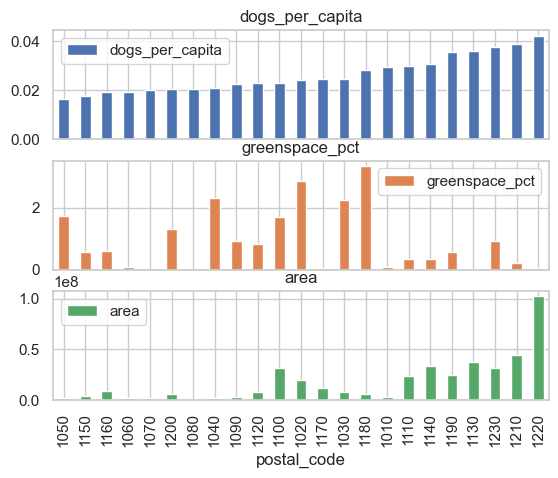

In [105]:
df_dpd_parks.sort_values("dogs_per_capita").plot(x="postal_code", y=["dogs_per_capita","greenspace_pct", "area"], kind="bar", subplots=True);

#### Visual Analysis: Scatterplot and Linear Model

We can then plot the data with a linear regression model fit to get a visual impression, if the hypothesis holds. 

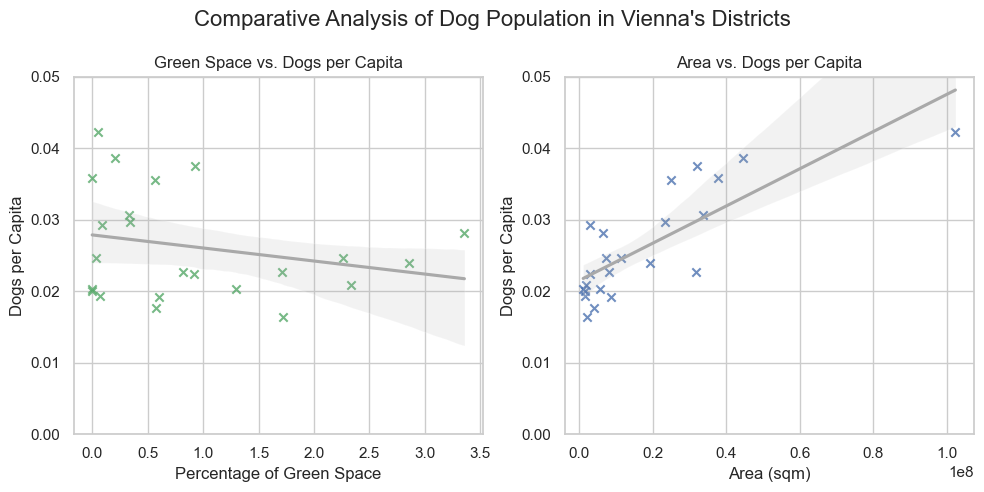

In [106]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

#regplot for greenspace_pct vs dogs_per_capita
sns.regplot(data=df_dpd_parks, x="greenspace_pct", y="dogs_per_capita", marker="x", 
            scatter_kws=dict(color="g"), line_kws=dict(color="darkgray"), ax=axs[0])
axs[0].set_xlabel("Percentage of Green Space")
axs[0].set_ylabel("Dogs per Capita")
axs[0].set_title("Green Space vs. Dogs per Capita")
axs[0].set_ylim([0, 0.05])

# regplot for area vs dogs_per_capita
sns.regplot(data=df_dpd_parks, x="area", y="dogs_per_capita", marker="x", scatter_kws=dict(color="b"), 
            line_kws=dict(color="darkgray"), ax=axs[1])
axs[1].set_xlabel("Area (sqm)")
axs[1].set_ylabel("Dogs per Capita")
axs[1].set_title("Area vs. Dogs per Capita")
axs[1].set_ylim([0, 0.05])


plt.suptitle("Comparative Analysis of Dog Population in Vienna's Districts", fontsize=16)
fig.align_ylabels(axs[:])
plt.tight_layout()
plt.show();
path=os.path.join('report_images', 'Hyp5_Fig1.png')
fig.savefig(path, format='png');

When creating a scatter plot and fitting a linear model to the data, we found that our initial hypothesis - that the percentage of green space is indicative of a higher dog population - was not supported. The scatter plot does not show strong correlation, and even if correlation was assumed, it would be slightly negative. Consequently, our hypothesis was not validated. 

When examining another variable, the area of each district, we saw a positive correlation. 
It appears that the size of a district may be a more reliable predictor of the dog population per inhabitant.


In [107]:
df_dpd_parks[["dogs_per_capita", "greenspace_pct"]].corr(method='pearson')

,dogs_per_capita,greenspace_pct
dogs_per_capita,1.000000,-0.244815
greenspace_pct,-0.244815,1.000000


In [108]:
df_dpd_parks[["dogs_per_capita", "area"]].corr(method='kendall')

,dogs_per_capita,area
dogs_per_capita,1.000000,0.604743
area,0.604743,1.000000


#### Statistical Testing

We can also calculate the respective p-values. 'alternative'=greater tests for a positive correlation:  

In [109]:
correlation_coefficient, p_value = pearsonr(df_dpd_parks['greenspace_pct'], df_dpd_parks['dogs_per_capita'], alternative='greater')

In [110]:
print(f"Pearson Correlation Coefficient for Greenspace and Dog Population: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient for Greenspace and Dog Population: -0.2448149042674904
P-value: 0.8698865190545944


In [111]:
p_value<0.05

False

In [112]:
correlation_coefficient, p_value = pearsonr(df_dpd_parks['area'], df_dpd_parks['dogs_per_capita'], alternative='greater')

In [113]:
print(f"Pearson Correlation Coefficient for District Overall Area and Dog Population: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient for District Overall Area and Dog Population: 0.8007205991533582
P-value: 2.2266624924101047e-06


In [114]:
p_value<0.05

True

#### Results and Comments

Our analysis found that a larger proportion of green space for dogs does not necessarily lead to higher dog population (per capita). Instead, we found that the overall size of a district seems to be a better indicator.
If green space and dog population do not have a positive correlation, one could argue that green spaces for dogs might not be built where needed. However, it’s important to note that our data only contains green spaces that are under the city’s administration, while other (national) parks or larger greens are omitted, but could also be used by dog owners and their pets. 